In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import scipy as sp
import numpy as np
import sklearn
import xgboost as xgb
import shap
import lime
import lime.lime_tabular
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

shap.initjs()

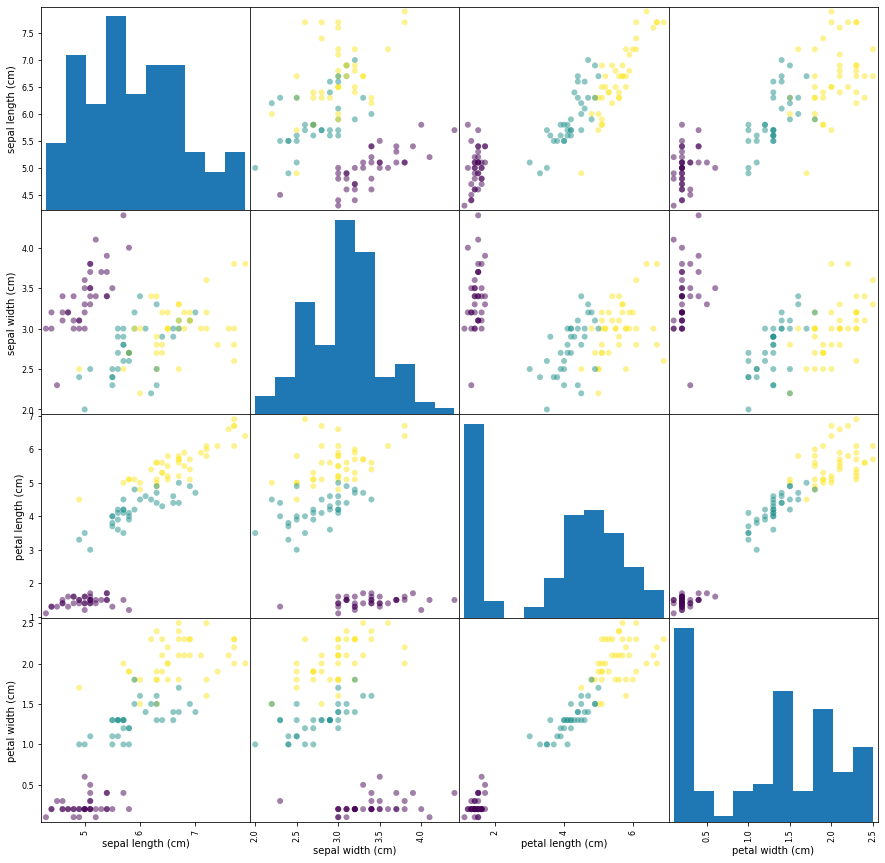

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
features = iris_dataset.feature_names
X,y = iris_dataset['data'], iris_dataset['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),marker='o')

In [3]:
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test,y_test)

0.9736842105263158

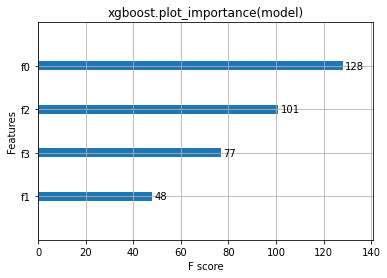

In [4]:
xgb.plot_importance(xgb_model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [5]:
explainer = shap.TreeExplainer(xgb_model,feature_names=features)
shap_values = explainer.shap_values(X)

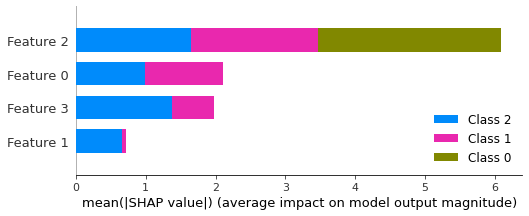

In [6]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [7]:
shap.force_plot(explainer.expected_value[0], shap_values[-1], X)

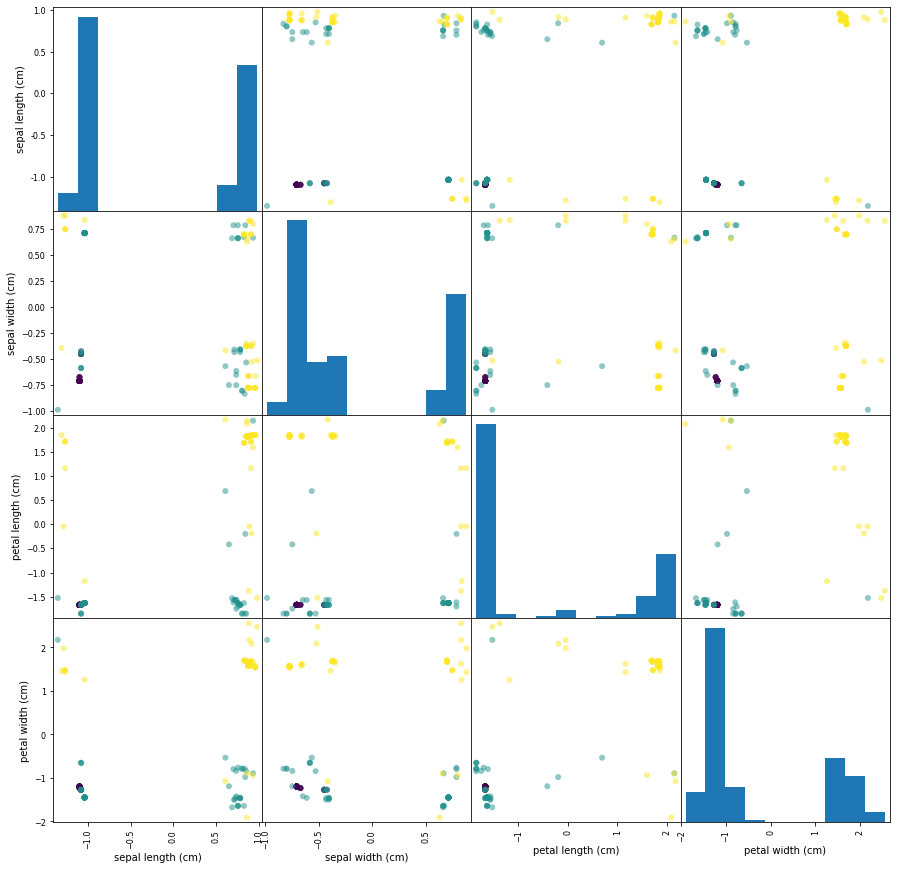

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

shap_dataframe = pd.DataFrame(shap_values[-1], columns=iris_dataset.feature_names)
shap_data = shap_values[-1].astype(np.double)
pd.plotting.scatter_matrix(shap_dataframe, c=y, figsize=(15,15),marker='o')
plt.show()

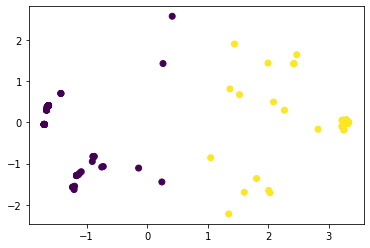

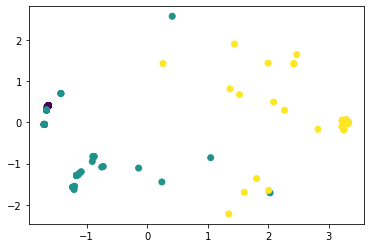

In [9]:
model = KMeans(n_clusters=2,random_state=0)
model.fit(shap_data)

cat = model.predict(shap_data)
clusters = np.unique(cat)

dims = PCA(n_components=2).fit_transform(shap_data)
dims = pd.DataFrame(dims,columns=['PC1','PC2'])

plt.scatter(dims['PC1'],dims['PC2'],c=model.predict(shap_data))
plt.show()
plt.scatter(dims['PC1'],dims['PC2'],c=y)

In [10]:
from scipy.stats.stats import pearsonr     
print(pearsonr(model.predict(shap_data),y))

(0.8445765603251978, 5.455787107554235e-42)


In [11]:
lime_values = np.zeros((len(y),4))

explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=features, verbose=True, mode='classification')

for i in range(len(y)):
    exp = explainer.explain_instance(X[i], xgb_model.predict_proba, num_features=10)
    _,lime_values_ = list(zip(*exp.as_list()))
    lime_values_ = np.array(lime_values_)
    lime_values[i] = lime_values_

Intercept 0.48542672664307085
Prediction_local [0.09795423]
Right: 0.00474845
Intercept 0.4859292644204727
Prediction_local [0.09850187]
Right: 0.0047472455
Intercept 0.4936296104130978
Prediction_local [0.09407893]
Right: 0.00474845
Intercept 0.492009710954708
Prediction_local [0.12803728]
Right: 0.00474845
Intercept 0.470604601554313
Prediction_local [0.09720283]
Right: 0.00474845
Intercept 0.2280093068040992
Prediction_local [0.87619971]
Right: 0.00474845
Intercept 0.478453266719287
Prediction_local [0.12584336]
Right: 0.00474845
Intercept 0.49943055112663787
Prediction_local [0.08640365]
Right: 0.00474845
Intercept 0.4903618544475393
Prediction_local [0.10216967]
Right: 0.005135439
Intercept 0.4770784570032186
Prediction_local [0.10610116]
Right: 0.00474845
Intercept 0.4741607543366066
Prediction_local [0.15463454]
Right: 0.00474845
Intercept 0.4864107271140376
Prediction_local [0.09625134]
Right: 0.00474845
Intercept 0.4884173233182425
Prediction_local [0.11784317]
Right: 0.004747

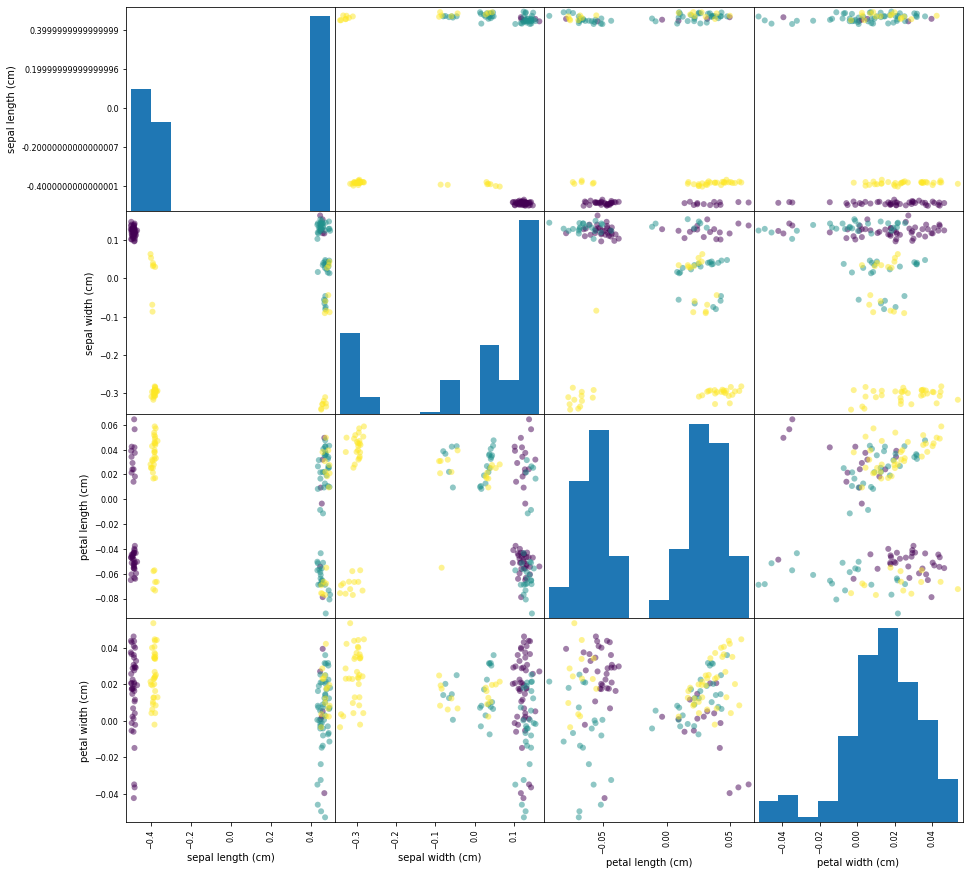

In [12]:
lime_dataframe = pd.DataFrame(lime_values, columns=iris_dataset.feature_names)
lime_data = lime_values.astype(np.double)
pd.plotting.scatter_matrix(lime_dataframe, c=y, figsize=(15,15),marker='o')
plt.show()

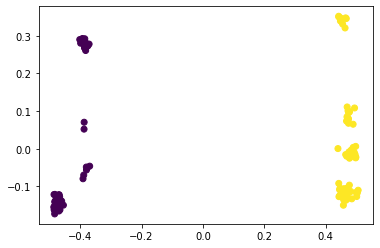

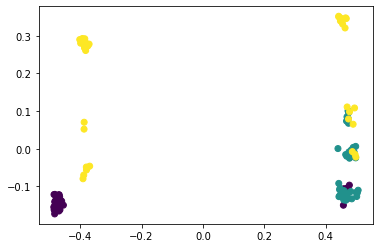

In [16]:
model = KMeans(n_clusters=2,random_state=0)
model.fit(lime_data)

cat = model.predict(lime_data)
clusters = np.unique(cat)

dims = PCA(n_components=2).fit_transform(lime_data)
dims = pd.DataFrame(dims,columns=['PC1','PC2'])

plt.scatter(dims['PC1'],dims['PC2'],c=model.predict(lime_data))
plt.show()
plt.scatter(dims['PC1'],dims['PC2'],c=y)

In [17]:
print(pearsonr(model.predict(lime_data),y))

(0.1634301126151534, 0.04568262670032225)
